In [34]:
import numpy as np
import matplotlib.pyplot as plt

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d0 = 1e-8
a = 7.29735e-3
E1x = 1
mu = 1e-3

theta_range = np.linspace(-np.pi / 2, np.pi / 2, 1000)
theta_F_real = []
theta_F_imag = []
theta_K_real = []
theta_K_imag = []

for theta in theta_range:  
    sigma_xy_b = 0
    sigma_xy_t = 0
    sigma_xx_b = 0
    sigma_xx_t = 0
    c3 = np.cos(theta)
    c2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    c1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    E1y = mu * c1 * E1x
    beta = np.exp(1j * n2 * k0 * d0 * c2)
    
    A = np.zeros((8, 8), dtype=complex)
    b = np.zeros(8, dtype=complex)

    A[0, 0] = 1
    A[0, 2] = -1
    A[0, 4] = -1
    b[0] = -E1x

    A[1, 1] = 1
    A[1, 3] = -1
    A[1, 5] = -1
    b[1] = -E1y

    A[2, 2] = beta
    A[2, 4] = np.conj(beta)
    A[2, 6] = -1
    b[2] = 0

    A[3, 3] = beta
    A[3, 5] = np.conj(beta)
    A[3, 7] = -1
    b[3] = 0

    A[4, 0] = -2 * a * sigma_xy_b
    A[4, 1] = 2 * a * sigma_xx_b + n1 / c1
    A[4, 3] = n2 / c2
    A[4, 5] = -n2 / c2
    b[4] = 2 * a * sigma_xy_b * E1x + (n1 / c1 - 2 * a * sigma_xx_b) * E1y

    A[5, 3] = -n2 * beta / c2
    A[5, 5] = n2 * np.conj(beta) / c2
    A[5, 6] = -2 * a * sigma_xy_t
    A[5, 7] = 2 * a * sigma_xx_t + 1 / c3
    b[5] = 0

    A[6, 0] = -n1 * c1 - 2 * a * sigma_xx_b
    A[6, 1] = -2 * a * sigma_xy_b
    A[6, 2] = -n2 * c2
    A[6, 4] = n2 * c2
    b[6] = (2 * a * sigma_xx_b - n1 * c1) * E1x + 2 * a * sigma_xy_b * E1y

    A[7, 2] = n2 * beta * c2
    A[7, 4] = -n2 * np.conj(beta) * c2
    A[7, 6] = -c3 - 2 * a * sigma_xx_t
    A[7, 7] = -2 * a * sigma_xy_t
    b[7] = 0

    x = np.linalg.solve(A, b)
    E2x, E2y, E3x, E3y, E4x, E4y, E5x, E5y = x

    theta_F = np.arctan(E5y / (E5x * c3))
    theta_K = np.arctan(E2y / (E2x * c1))
    theta_F_real.append(theta_F.real)
    theta_F_imag.append(theta_F.imag)
    theta_K_real.append(theta_K.real)
    theta_K_imag.append(theta_K.imag)
    

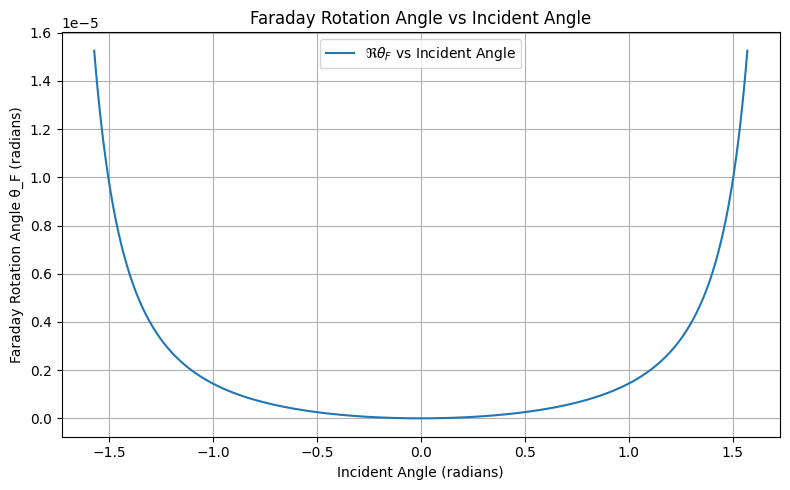

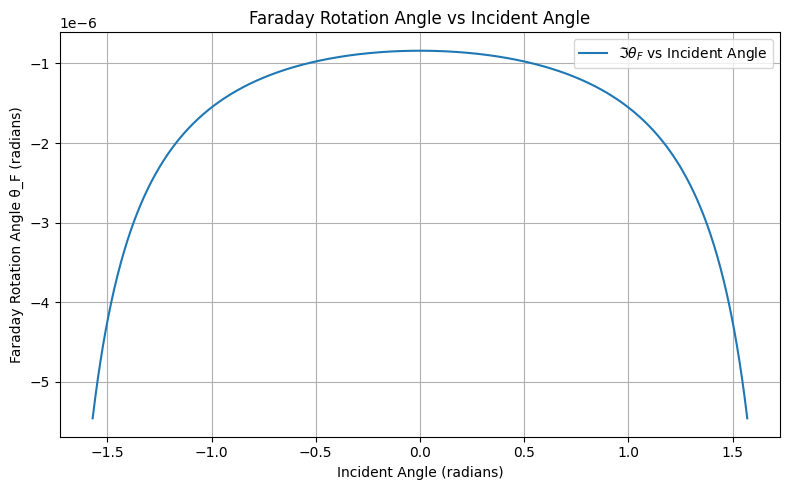

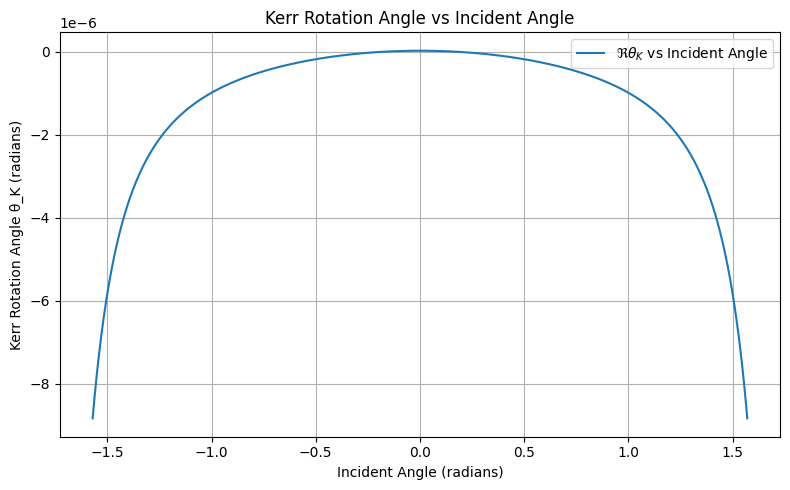

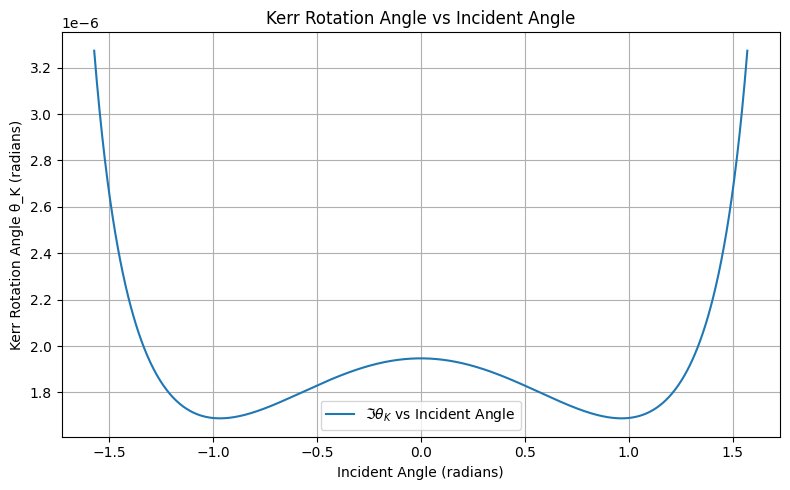

In [35]:
theta_F_real_list = []
theta_F_imag_list = []
theta_K_real_list = []
theta_K_imag_list = []

for i in range(1000):
    theta = theta_range[i]
    sigma_xy_b = -0.5
    sigma_xy_t = 0.5
    sigma_xx_b = 0.5
    sigma_xx_t = 0.5
    c3 = np.cos(theta)
    c2 = np.sqrt(n2**2 - n3**2 * np.sin(theta)**2) / n2
    c1 = np.sqrt(n1**2 - n3**2 * np.sin(theta)**2) / n1
    E1y = mu * c1 * E1x
    beta = np.exp(1j * n2 * k0 * d0 * c2)
    
    A = np.zeros((8, 8), dtype=complex)
    b = np.zeros(8, dtype=complex)

    A[0, 0] = 1
    A[0, 2] = -1
    A[0, 4] = -1
    b[0] = -E1x

    A[1, 1] = 1
    A[1, 3] = -1
    A[1, 5] = -1
    b[1] = -E1y

    A[2, 2] = beta
    A[2, 4] = np.conj(beta)
    A[2, 6] = -1
    b[2] = 0

    A[3, 3] = beta
    A[3, 5] = np.conj(beta)
    A[3, 7] = -1
    b[3] = 0

    A[4, 0] = -2 * a * sigma_xy_b
    A[4, 1] = 2 * a * sigma_xx_b + n1 / c1
    A[4, 3] = n2 / c2
    A[4, 5] = -n2 / c2
    b[4] = 2 * a * sigma_xy_b * E1x + (n1 / c1 - 2 * a * sigma_xx_b) * E1y

    A[5, 3] = -n2 * beta / c2
    A[5, 5] = n2 * np.conj(beta) / c2
    A[5, 6] = -2 * a * sigma_xy_t
    A[5, 7] = 2 * a * sigma_xx_t + 1 / c3
    b[5] = 0

    A[6, 0] = -n1 * c1 - 2 * a * sigma_xx_b
    A[6, 1] = -2 * a * sigma_xy_b
    A[6, 2] = -n2 * c2
    A[6, 4] = n2 * c2
    b[6] = (2 * a * sigma_xx_b - n1 * c1) * E1x + 2 * a * sigma_xy_b * E1y

    A[7, 2] = n2 * beta * c2
    A[7, 4] = -n2 * np.conj(beta) * c2
    A[7, 6] = -c3 - 2 * a * sigma_xx_t
    A[7, 7] = -2 * a * sigma_xy_t
    b[7] = 0

    x = np.linalg.solve(A, b)
    E2x, E2y, E3x, E3y, E4x, E4y, E5x, E5y = x

    theta_F = np.arctan(E5y / (E5x * c3))
    theta_K = np.arctan(E2y / (E2x * c1))
    theta_F_real_list.append(theta_F.real - theta_F_real[i])
    theta_F_imag_list.append(theta_F.imag - theta_F_imag[i])
    theta_K_real_list.append(theta_K.real - theta_K_real[i])
    theta_K_imag_list.append(theta_K.imag - theta_K_imag[i])

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_F_real_list, label=r'$\Re\theta_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Faraday Rotation Angle θ_F (radians)")
plt.title("Faraday Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()   

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_K_real_list, label=r'$\Re\theta_K$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(theta_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs Incident Angle')
plt.xlabel("Incident Angle (radians)")
plt.ylabel("Kerr Rotation Angle θ_K (radians)")
plt.title("Kerr Rotation Angle vs Incident Angle")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
